In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/megasena/mega.csv


In [2]:
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
import re
import datetime

In [3]:
def read(data_file, sep=','):
    try:
        df = pd.read_csv(data_file, sep)
        return df
    except Exception as e:
        print(e)
        
df = read('/kaggle/input/megasena/mega.csv')
df.head(5)

,n1,n2,n3,n4,n5,n6
0,7,14,32,37,40,60
1,11,22,25,27,55,59
2,2,10,11,24,38,56
3,4,11,17,18,21,48
4,17,18,27,32,39,58


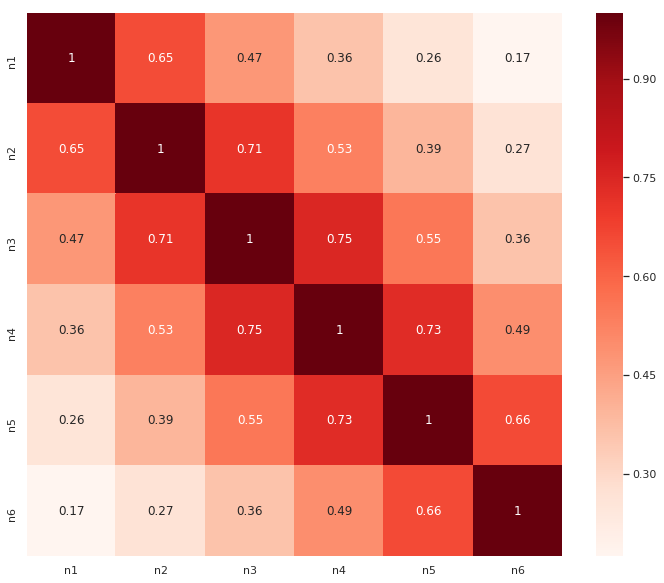

In [4]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
df.describe()

,n1,n2,n3,n4,n5,n6
count,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000
mean,8.566364,17.166117,26.108821,34.906018,43.566777,52.223001
std,7.062543,9.157636,9.941671,9.898674,9.076801,6.921187
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,46.000000,48.000000,54.000000,58.000000,59.000000,60.000000


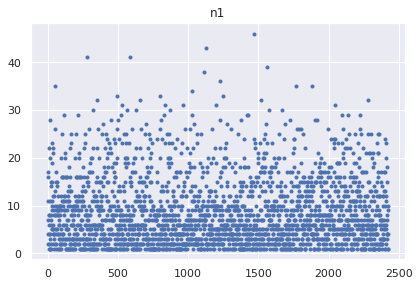

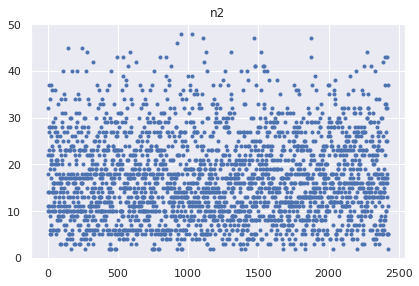

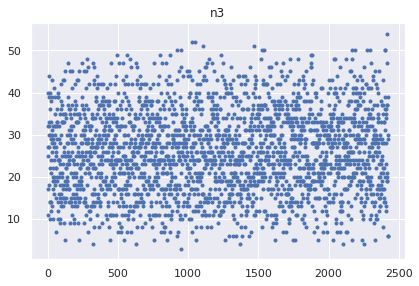

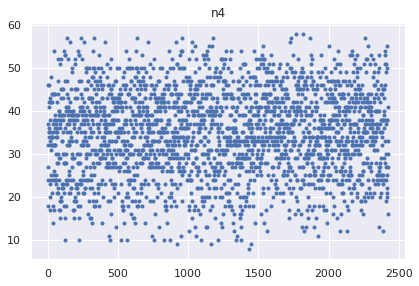

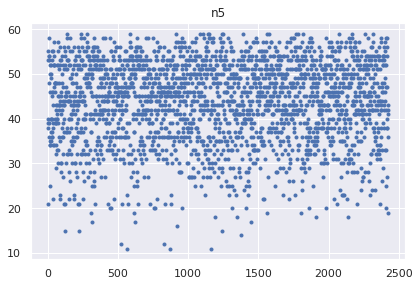

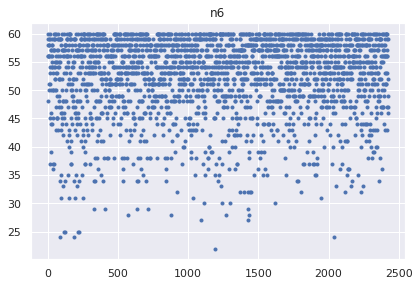

In [6]:
_x = [i for i in range(0,2426)]

def plot_charts():
    for column in df.columns.values:
        plot_chart(column)
    
def plot_chart(column):
    _y = df[column]
    plt.figure()
    plt.scatter(_x, _y, marker='.')
    plt.tight_layout()
    plt.title(column)
    plt.show()
    
plot_charts()

In [7]:
def get_tuples():
    return list(zip(df['n1'], df['n2'], df['n3'], df['n4'], df['n5'], df['n6']))

_min = df.min(axis=1)
_max = df.max(axis=1)
_mean = df.mean(axis=1)
_std = df.std(axis=1)
_var = df.var(axis=1)
_median = df.median(axis=1)
Q1 = df.quantile(0.25, axis=1)
Q3 = df.quantile(0.75, axis=1)

#magnitudes = np.ndarray((2425,)) 
#i = 0
#for t in get_tuples():
#    basic = np.array(t)
#    magnitudes[i] = np.linalg.norm(np.square(basic))
#    i = i + 1
    
#df['abs'] = pd.Series(magnitudes)
df['min'] = _min
df['max'] = _max
df['mean'] = _mean
df['std'] = _std
df['var'] = _var
df['median'] = _median
df['iqr'] = Q3 - Q1

df.head(5)

,n1,n2,n3,n4,n5,n6,min,max,mean,std,var,median,iqr
0,7,14,32,37,40,60,7,60,31.666667,19.085771,364.266667,34.5,20.75
1,11,22,25,27,55,59,11,59,33.166667,19.312345,372.966667,26.0,25.25
2,2,10,11,24,38,56,2,56,23.500000,20.334699,413.500000,17.5,24.25
3,4,11,17,18,21,48,4,48,19.833333,15.065413,226.966667,17.5,7.75
4,17,18,27,32,39,58,17,58,31.833333,15.302505,234.166667,29.5,17.00


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model

N_TIME_STEPS = 6
N_FEATURES = 6
step = 6
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    n1s = df['n1'].values[i: i + N_TIME_STEPS]
    n2s = df['n2'].values[i: i + N_TIME_STEPS]
    n3s = df['n3'].values[i: i + N_TIME_STEPS]
    n4s = df['n4'].values[i: i + N_TIME_STEPS]
    n5s = df['n5'].values[i: i + N_TIME_STEPS]
    n6s = df['n6'].values[i: i + N_TIME_STEPS]
    
    #mins = df['min'].values[i: i + N_TIME_STEPS]
    #maxs = df['max'].values[i: i + N_TIME_STEPS]
    #means = df['mean'].values[i: i + N_TIME_STEPS]
    #stds = df['std'].values[i: i + N_TIME_STEPS]
    #var = df['var'].values[i: i + N_TIME_STEPS]
    #medians = df['median'].values[i: i + N_TIME_STEPS]
    #iqrs = df['iqr'].values[i: i + N_TIME_STEPS]    
    
    if i + N_TIME_STEPS + 1 < df.shape[0]:
        label = df.iloc[i + N_TIME_STEPS + 1]

    #segments.append([n1s, n2s, n3s, n4s, n5s, n6s, 
     #                mins, maxs, means, stds, var, medians, iqrs])
    segments.append([n1s, n2s, n3s, n4s, n5s, n6s])

    labels.append(label)

print(np.array(segments).shape)

Using TensorFlow backend.


(404, 6, 6)


In [9]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(labels)

In [10]:
model = Sequential()
model.add(LSTM(10, input_shape=(6,6)))
model.add(Dense(13, activation='linear'))

model.compile(loss='mse', optimizer='adam')

#X,y = get_train()
model.fit(reshaped_segments, labels, epochs=300, shuffle=False, verbose=0)

In [11]:
yhat = model.predict(reshaped_segments, verbose=0)
print(yhat[0])

[ 8.227339 17.207153 24.676794 29.316008 32.13108  34.198112  8.227368
 33.934864 27.478067 17.355179 39.02285  27.305641 21.747816]
